### Loading The Required Libraries

In [2]:
!pip install xgboost

     --------------------------------------- 70.9/70.9 MB 22.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import IsolationForest


### Loading The Dataset

In [5]:
data = pd.read_csv("creditcard.csv")

### Dataset Description

In [6]:
print("Dataset Description:")
print("Number of transactions:", len(data))
print("Number of fraud transactions:", data['Class'].sum())
print("Percentage of fraud transactions: {:.3f}%".format(data['Class'].mean() * 100))
print("Class imbalance ratio: 1 to {:.2f}".format(1 / data['Class'].mean()))
print("Features:", data.columns[:-1].tolist())


Dataset Description:
Number of transactions: 284807
Number of fraud transactions: 492
Percentage of fraud transactions: 0.173%
Class imbalance ratio: 1 to 578.88
Features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


### Splitting The Dataset

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(data, data["Class"], test_size=0.2)

### Feature Scaling

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training The Models

In [11]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)

gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, Y_train)

deep_learning = Sequential()
deep_learning.add(Dense(128, activation="relu"))
deep_learning.add(Dense(64, activation="relu"))
deep_learning.add(Dense(1, activation="sigmoid"))
deep_learning.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
deep_learning.fit(X_train, Y_train, epochs=10)

isolation_forest = IsolationForest()
isolation_forest.fit(X_train)

Epoch 1/10
7121/7121 [==============================] - 7s 911us/step - loss: 0.0014 - accuracy: 0.9999
Epoch 2/10
7121/7121 [==============================] - 7s 969us/step - loss: 2.4887e-08 - accuracy: 1.0000
Epoch 3/10
7121/7121 [==============================] - 7s 924us/step - loss: 1.1756e-09 - accuracy: 1.0000
Epoch 4/10
7121/7121 [==============================] - 8s 1ms/step - loss: 1.2126e-10 - accuracy: 1.0000
Epoch 5/10
7121/7121 [==============================] - 7s 1ms/step - loss: 4.5083e-11 - accuracy: 1.0000
Epoch 6/10
7121/7121 [==============================] - 7s 957us/step - loss: 2.8214e-11 - accuracy: 1.0000
Epoch 7/10
7121/7121 [==============================] - 7s 968us/step - loss: 2.0870e-11 - accuracy: 1.0000
Epoch 8/10
7121/7121 [==============================] - 7s 917us/step - loss: 1.6568e-11 - accuracy: 1.0000
Epoch 9/10
7121/7121 [==============================] - 7s 966us/step - loss: 1.3938e-11 - accuracy: 1.0000
Epoch 10/10
7121/7121 [=============

IsolationForest()

In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation="relu", solver="adam", learning_rate="constant", learning_rate_init=0.001)
mlp.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(100, 100))

### Evaluating The Models

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# Calculating false positive rate and true positive rate for each model
fpr_lr, tpr_lr, _ = roc_curve(Y_test, logistic_regression.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(Y_test, random_forest.predict_proba(X_test)[:, 1])
fpr_gb, tpr_gb, _ = roc_curve(Y_test, gradient_boosting.predict_proba(X_test)[:, 1])
fpr_dl, tpr_dl, _ = roc_curve(Y_test, deep_learning.predict(X_test))
fpr_mlp, tpr_mlp, _ = roc_curve(Y_test, mlp.predict_proba(X_test)[:, 1])
fpr_if, tpr_if, _ = roc_curve(Y_test, isolation_forest.predict(X_test))

1781/1781 [==============================] - 1s 499us/step


In [39]:
# Calculating AUC for each model
auc_lr = roc_auc_score(Y_test, logistic_regression.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(Y_test, random_forest.predict_proba(X_test)[:, 1])
auc_gb = roc_auc_score(Y_test, gradient_boosting.predict_proba(X_test)[:, 1])
auc_dl = roc_auc_score(Y_test, deep_learning.predict(X_test))
auc_mlp = roc_auc_score(Y_test, mlp.predict_proba(X_test)[:, 1])
auc_if = roc_auc_score(Y_test, isolation_forest.predict(X_test))


1781/1781 [==============================] - 1s 494us/step


### Plotting  The Result

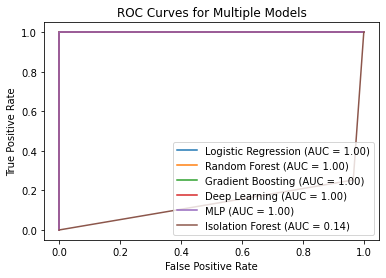

In [40]:
# Plotting the ROC curves
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(auc_lr))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(auc_rf))
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = {:.2f})'.format(auc_gb))
plt.plot(fpr_dl, tpr_dl, label='Deep Learning (AUC = {:.2f})'.format(auc_dl))
plt.plot(fpr_mlp, tpr_mlp, label='MLP (AUC = {:.2f})'.format(auc_mlp))
plt.plot(fpr_if, tpr_if, label='Isolation Forest (AUC = {:.2f})'.format(auc_if))

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Models')
plt.legend(loc='lower right')

# Show the plot
plt.show()